In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from metapub import PubMedFetcher, FindIt
import numpy as np


In [2]:
clingen_df = pd.read_csv("../data/clingen_curated_variants.txt", sep="\t")
clingen_df.head()

,#Variation,ClinVar Variation Id,Allele Registry Id,HGVS Expressions,HGNC Gene Symbol,Disease,Mondo Id,Mode of Inheritance,Assertion,Applied Evidence Codes (Met),Applied Evidence Codes (Not Met),Summary of interpretation,PubMed Articles,Expert Panel,Guideline,Approval Date,Published Date,Retracted,Evidence Repo Link,Uuid
0,NM_000277.2(PAH):c.1A>G (p.Met1Val),586,CA114360,"NM_000277.2:c.1A>G, NC_000012.12:g.102917130T>...",PAH,phenylketonuria,MONDO:0009861,Autosomal recessive inheritance,Pathogenic,"PM3, PP4_Moderate, PM2, PS3",PVS1,PAH-specific ACMG/AMP criteria applied: PM2: g...,"2574002, 2574002, 9450897",Phenylketonuria VCEP,NaN,2019-03-23,2019-05-10,False,https://erepo.genome.network/evrepo/ui/classif...,89f04437-ed5d-4735-8c4a-a9b1d91d10ea
1,NM_000277.2(PAH):c.806delT (p.Ile269Thrfs),102844,CA229778,"NM_000277.2:c.806delT, NC_000012.12:g.10285285...",PAH,phenylketonuria,MONDO:0009861,Autosomal recessive inheritance,Pathogenic,"PVS1, PM2, PP4",NaN,PAH-specific ACMG/AMP criteria applied: PVS1: ...,9012412,Phenylketonuria VCEP,NaN,2018-08-10,2019-08-17,False,https://erepo.genome.network/evrepo/ui/classif...,f5d8dc3f-dba0-4dc9-98cd-4a22b6a11a83
2,NM_000277.2(PAH):c.561G>A (p.Trp187Ter),102736,CA229624,"NM_000277.2:c.561G>A, NC_000012.12:g.102855281...",PAH,phenylketonuria,MONDO:0009861,Autosomal recessive inheritance,Pathogenic,"PVS1, PP4_Moderate, PM2",NaN,PAH-specific ACMG/AMP criteria applied: PVS1: ...,8268925,Phenylketonuria VCEP,NaN,2018-08-10,2019-04-06,False,https://erepo.genome.network/evrepo/ui/classif...,c75a3cc6-1a5e-4837-b431-6e2b2a14c0b1
3,NM_000277.2(PAH):c.503delA (p.Tyr168Serfs),102705,CA229588,"NM_000277.2:c.503delA, NC_000012.12:g.10286660...",PAH,phenylketonuria,MONDO:0009861,Autosomal recessive inheritance,Pathogenic,"PVS1, PM2, PP4",NaN,PAH-specific ACMG/AMP criteria applied: PVS1: ...,23430918,Phenylketonuria VCEP,NaN,2018-08-10,2019-08-17,False,https://erepo.genome.network/evrepo/ui/classif...,7a494430-377e-4473-a5f7-e0698ec51cab
4,NM_000277.2(PAH):c.1089delG (p.Lys363Asnfs),102518,CA229336,"NM_000277.2:c.1089delG, NC_000012.12:g.1028437...",PAH,phenylketonuria,MONDO:0009861,Autosomal recessive inheritance,Pathogenic,"PVS1, PM2, PP4",NaN,PAH-specific ACMG/AMP criteria applied: PVS1: ...,8659548,Phenylketonuria VCEP,NaN,2018-08-10,2019-08-17,False,https://erepo.genome.network/evrepo/ui/classif...,f73ce257-c08b-40ce-845f-012c6403252c


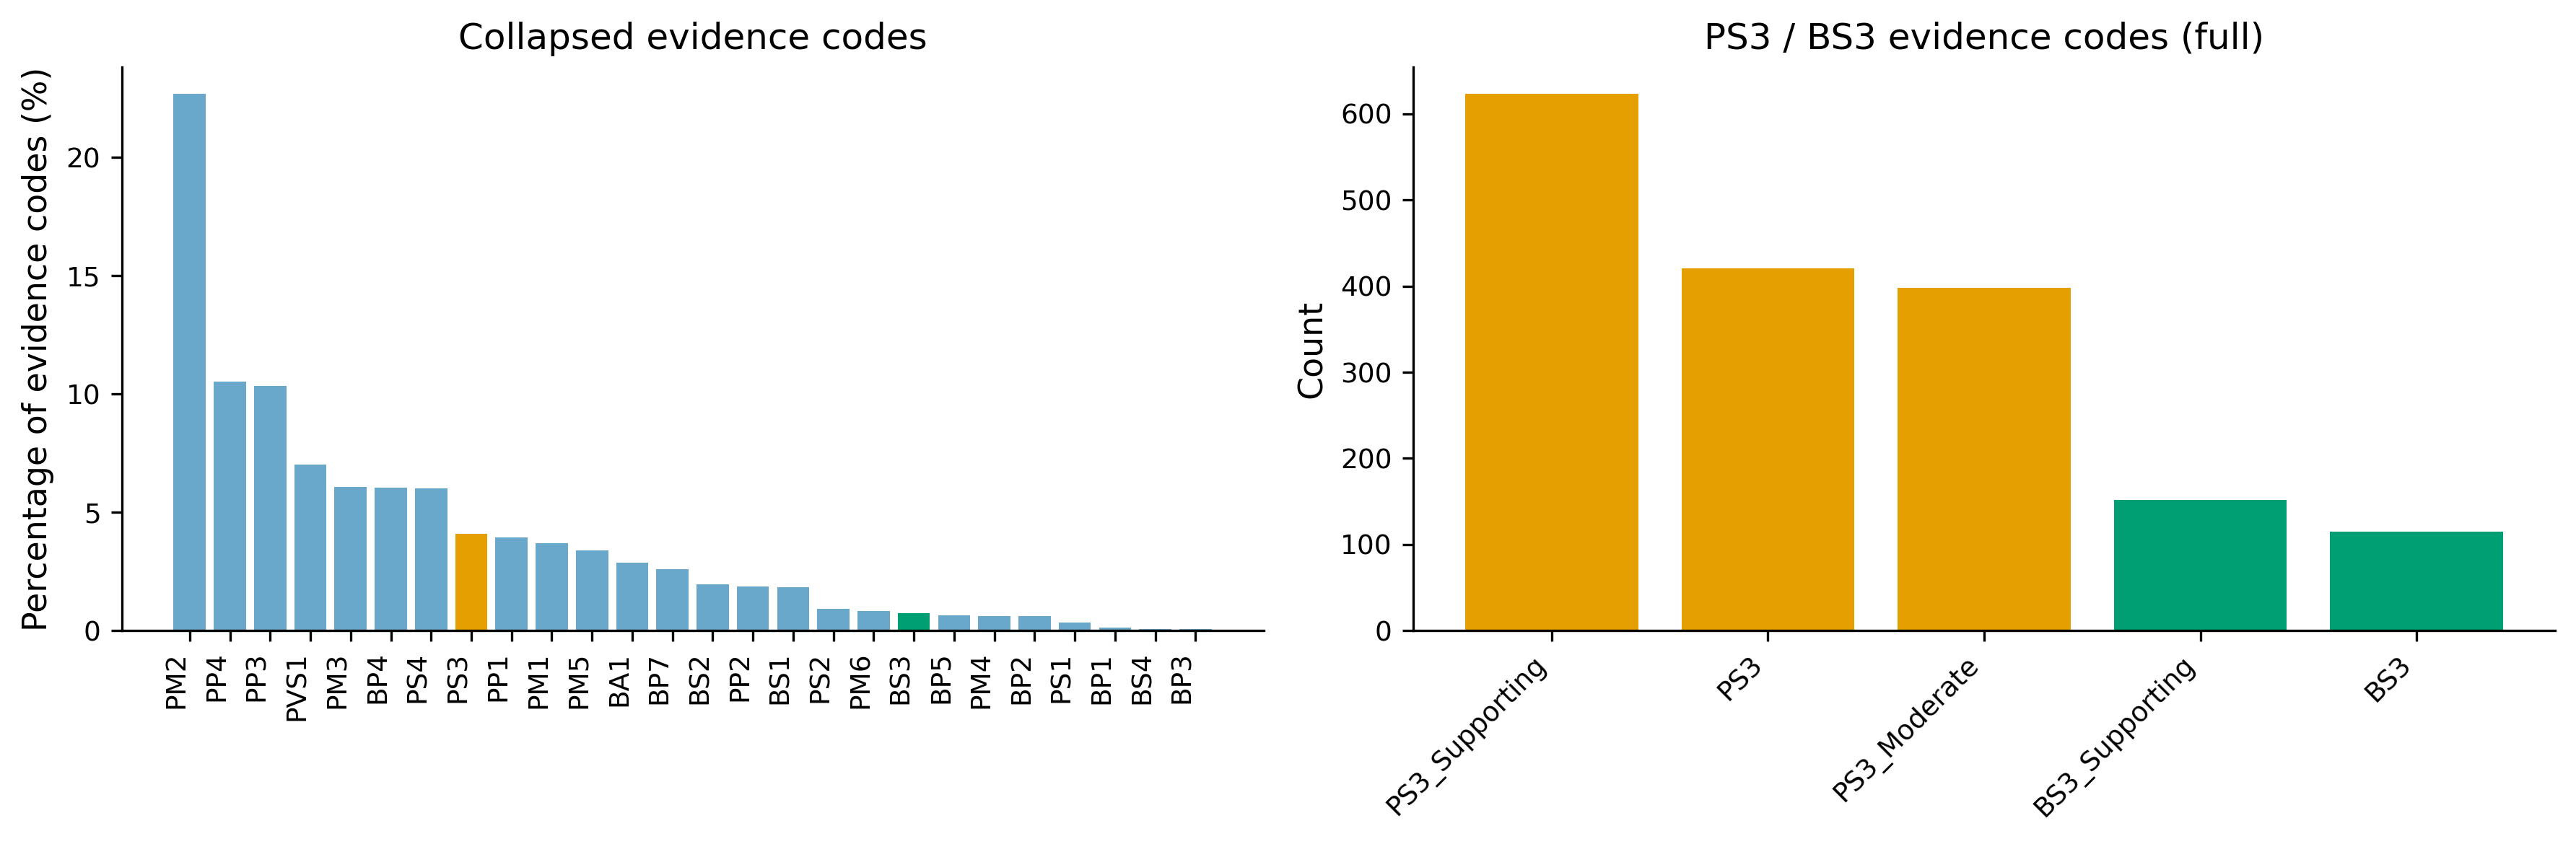

In [4]:
# --- Color definitions -------------------------------------------------------
color_ps3   = "#E69F00"   # orange-like
color_bs3   = "#009E73"   # green-like
color_other = "#69A7CB"   # blue-like

# --- Data prep --------------------------------------------------------------

col = clingen_df["Applied Evidence Codes (Met)"].fillna("")
split_codes = col.str.split(",")

# Flatten + clean
all_codes = split_codes.explode().str.strip()
all_codes = all_codes[all_codes != ""]

# PS3/BS3 full codes (with suffixes)
ps_bs_mask = all_codes.str.startswith(("PS3", "BS3"))
ps_bs_counts = all_codes[ps_bs_mask].value_counts()

# Collapsed codes (remove substring after "_")
base_codes = all_codes.str.split("_").str[0]
base_counts = base_codes.value_counts()

# Convert collapsed counts to percentages
base_pct = base_counts / base_counts.sum() * 100

# Determine colors for collapsed codes
base_colors = [
    (color_ps3 if code.startswith("PS3")
     else color_bs3 if code.startswith("BS3")
     else color_other)
    for code in base_pct.index
]

# --- Plotting style tweaks (publication-ish) ------------------------------

plt.rcParams.update({
    "font.size": 10,
    "axes.labelsize": 11,
    "axes.titlesize": 12,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
})

fig, axes = plt.subplots(1, 2, figsize=(12, 4), dpi=300)
ax1, ax2 = axes

# --- Plot 1: percentages for collapsed codes ------------------------------

x1 = np.arange(len(base_pct))
ax1.bar(x1, base_pct.values, color=base_colors)

ax1.set_xticks(x1)
ax1.set_xticklabels(base_pct.index, rotation=90, ha="right", fontsize=9)

ax1.set_ylabel("Percentage of evidence codes (%)")
ax1.set_title("Collapsed evidence codes")

# --- Plot 2: counts for full PS3/BS3 codes --------------------------------

labels2 = ps_bs_counts.index
x2 = np.arange(len(labels2))

colors_plot2 = [
    color_ps3 if lab.startswith("PS3") else color_bs3
    for lab in labels2
]

ax2.bar(x2, ps_bs_counts.values, color=colors_plot2)

ax2.set_xticks(x2)
ax2.set_xticklabels(labels2, rotation=45, ha="right")

ax2.set_ylabel("Count")
ax2.set_title("PS3 / BS3 evidence codes (full)")

# Clean up spines for both axes
for ax in (ax1, ax2):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

fig.tight_layout()


# --- Save to files --------------------------------------------------

#fig.savefig("../res/figures/clingen_evidence_codes.png", bbox_inches="tight", dpi=300)
#fig.savefig("../res/figures/clingen_evidence_codes.pdf", bbox_inches="tight")

plt.show()
